In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install numpy==1.23.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [ ]:
import os
from PIL import Image

# create a list to store the images
images = []

# loop through the files in the folder
for file in os.listdir('/content/drive/MyDrive/New folder'):
  # check if the file is an image
  if file.endswith('.jpg') or file.endswith('.png'):
    # read the image and append it to the list
    img = Image.open(os.path.join('/content/drive/MyDrive/New folder', file))
    images.append(img)


In [ ]:
import glob

breast_img = glob.glob('/content/drive/MyDrive/New folder/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

/content/drive/MyDrive/New folder/aeqpxjlbwu/101.png
/content/drive/MyDrive/New folder/aeqpxjlbwu/116.png
/content/drive/MyDrive/New folder/aeqpxjlbwu/118.png


In [ ]:
non_fake_img = []
fake_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_fake_img.append(img)

    elif img[-5] == '1' :
        fake_img.append(img)




In [ ]:
non_fake_num = len(non_fake_img)  # No cancer
fake_num = len(fake_img)   # Cancer

total_img_num = non_fake_num + fake_num

print('Number of Images of  real: {}' .format(non_fake_num))   # images of Non cancer
print('Number of Images of fake : {}' .format(fake_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of  real: 204
Number of Images of fake : 203
Total Number of Images : 407


In [ ]:
data_insight_1 = pd.DataFrame({'state of fake' : ['0','1'],'Numbers of fake images' : [204,203]})
data_insight_1

,state of fake,Numbers of fake images
0,0,204
1,1,203


In [ ]:
import plotly.express as px

bar = px.bar(data_frame=data_insight_1, x = 'state of fake', y='Numbers of fake images', color='state of fake')
bar.update_layout(title_text='Number of fake images (1) and number of real images  (0)', title_x=0.5)
bar.show()

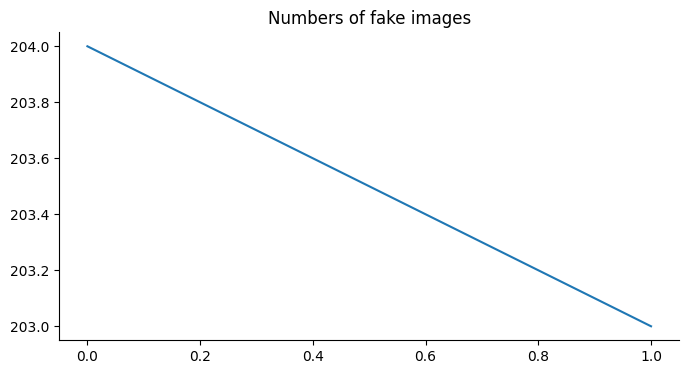

In [ ]:
# @title Numbers of fake images

from matplotlib import pyplot as plt
data_insight_1['Numbers of fake images'].plot(kind='line', figsize=(8, 4), title='Numbers of fake images')
plt.gca().spines[['top', 'right']].set_visible(False)

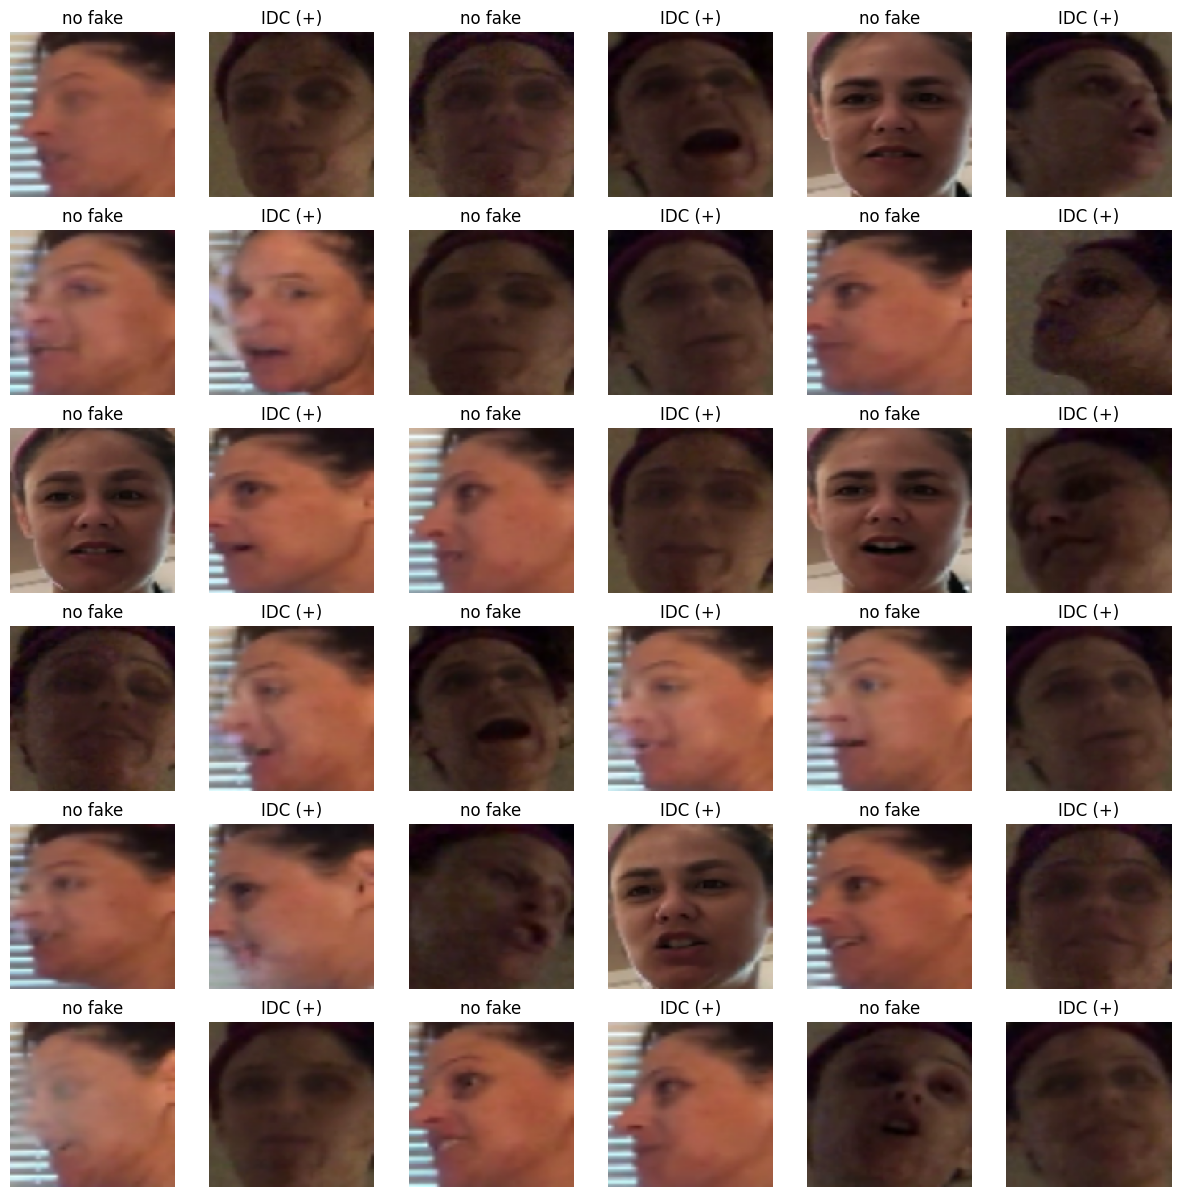

In [ ]:
# Import the load_img and img_to_array functions from tensorflow.keras.utils
from tensorflow.keras.utils import load_img, img_to_array

N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)

    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:

        # Use load_img instead of image.load_img
        img = load_img((N_IDC[num]), target_size=(100, 100))
        # Use img_to_array instead of image.img_to_array
        img = img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no fake')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:

        # Use load_img instead of image.load_img
        img = load_img((P_IDC[num]), target_size=(100, 100))
        # Use img_to_array instead of image.img_to_array
        img = img_to_array(img)

        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1


In [ ]:
NewN_IDC=N_IDC[:204]
print(len(NewN_IDC))
print(len(P_IDC))

204
203


In [ ]:

non_img_arr = []
can_img_arr = []

for img in NewN_IDC:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [ ]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr[:12389], can_img_arr[:12389]))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

<__array_function__ internals>:180: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 407
Number of IDC(-) Images: 348
Number of IDC(+) Images: 59
Image shape (Width, Height, Channels): (50, 50, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (284, 50, 50, 3)
Testing Data Shape: (123, 50, 50, 3)


In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers



In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Model
vgg_model=VGG19(input_shape=(50,50,3),include_top=False)
x=Flatten()(vgg_model.output)
prediction=Dense(2,activation='softmax')(x)
model=Model(inputs=vgg_model.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:

model.compile(Adamax(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 60, batch_size = 35, shuffle=True)


Epoch 1/60
9/9 [==============================] - 57s 6s/step - loss: 2.4909 - accuracy: 0.7183 - val_loss: 0.4868 - val_accuracy: 0.8537
Epoch 2/60
9/9 [==============================] - 52s 6s/step - loss: 0.3916 - accuracy: 0.8556 - val_loss: 0.4616 - val_accuracy: 0.8537
Epoch 3/60
9/9 [==============================] - 52s 6s/step - loss: 0.3640 - accuracy: 0.8556 - val_loss: 0.4537 - val_accuracy: 0.8537
Epoch 4/60
9/9 [==============================] - 52s 6s/step - loss: 0.3569 - accuracy: 0.8556 - val_loss: 0.5204 - val_accuracy: 0.8537
Epoch 5/60
9/9 [==============================] - 53s 6s/step - loss: 0.3231 - accuracy: 0.8556 - val_loss: 0.5868 - val_accuracy: 0.8537
Epoch 6/60
9/9 [==============================] - 52s 6s/step - loss: 0.2994 - accuracy: 0.8556 - val_loss: 0.5315 - val_accuracy: 0.8537
Epoch 7/60
9/9 [==============================] - 52s 6s/step - loss: 0.2995 - accuracy: 0.8556 - val_loss: 0.7399 - val_accuracy: 0.8537
Epoch 8/60
9/9 [==================

In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save your model to a folder named 'models' in your Google Drive
model.save('/content/drive/MyDrive/vgg_19model/deepfake_vgg_19.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



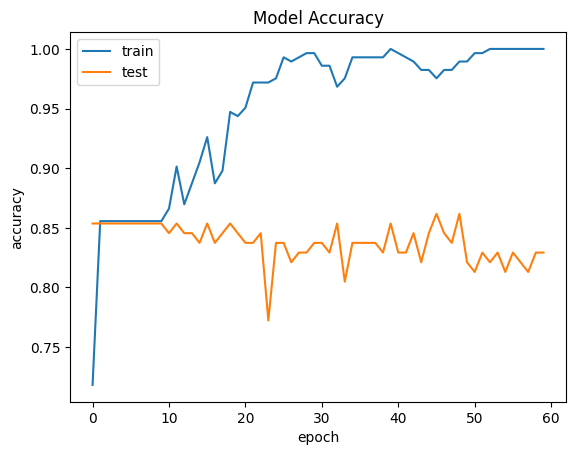

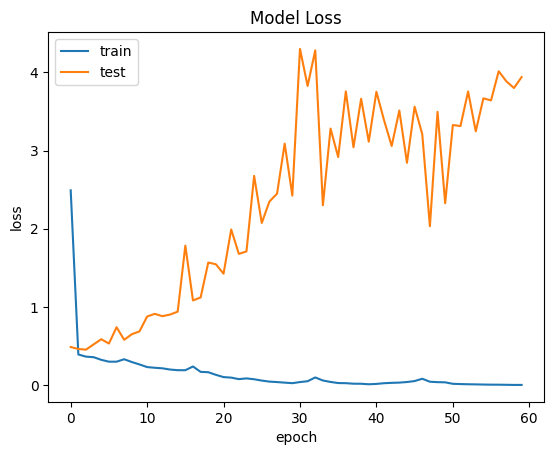

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 5s 1s/step - loss: 3.9391 - accuracy: 0.8293


[3.9390718936920166, 0.8292682766914368]

4/4 [==============================] - 9s 2s/step


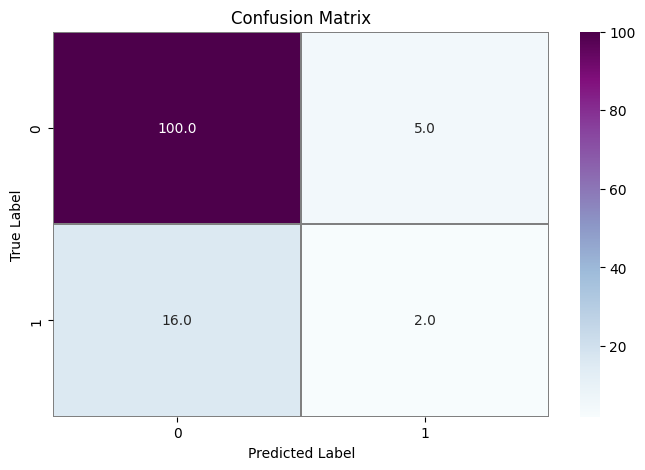

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_test,axis = 1)
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


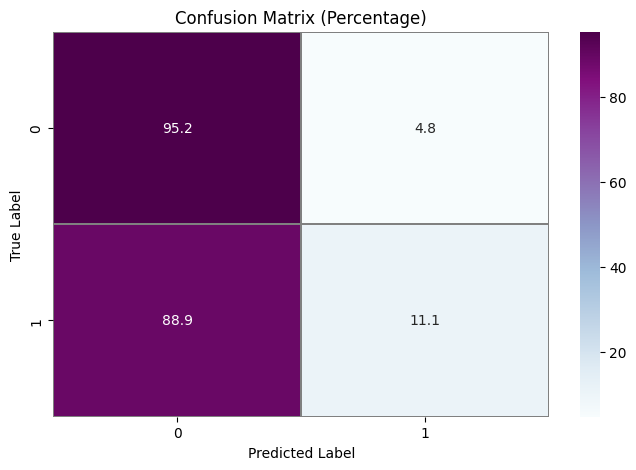

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# calculate the percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx_percent, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()



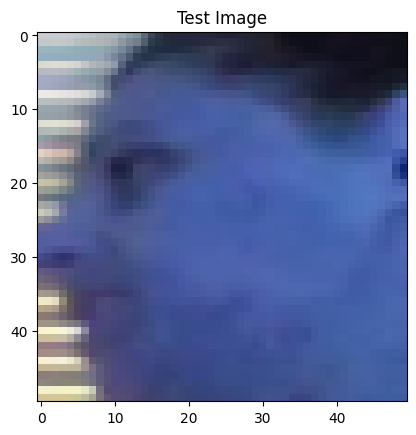

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

# Get the length of the array
n = len(X_test)

# Loop over the indices from 0 to n-1
for i in range(n):
    # Plot the image at each index
    img_plot(X_test, i)


1/1 [==============================] - 0s 161ms/step
Predicted Value using cnn model <built-in method argmax of numpy.ndarray object at 0x7c6fb0aab8d0>
True Value <built-in method argmax of numpy.ndarray object at 0x7c6f9bd487b0>


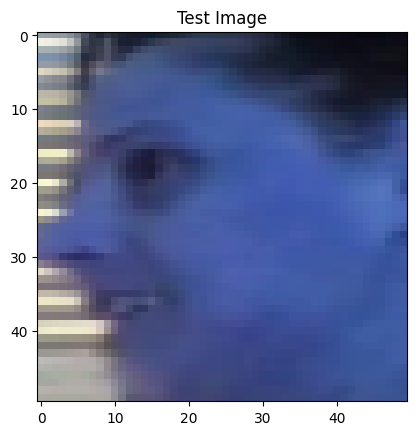

In [ ]:
import random

def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

# Get the length of the array
n = len(X_test)

# Get a random index within the range
index = random.randint(0, n-1)

# Get the input data as a numpy array
input = np.array([X_test[index]])
# Predict the label using the model
pred = model.predict(input)[0].argmax
# Get the true label
label = Y_test[index].argmax
# Print the results
print('Predicted Value using cnn model',pred)
print("True Value",label)
# Plot the image
img_plot(X_test, index)
